In [62]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

# def load_csvs(path):

#     X_train = pd.read_csv(f'{path}/X_trainval.csv', index_col=0)
#     X_train_hat = pd.read_csv(f'{path}/X_trainval_hat.csv', index_col=0)
#     X_test = pd.read_csv(f'{path}/X_test.csv', index_col=0)
#     X_test_hat = pd.read_csv(f'{path}/X_test_hat.csv', index_col=0)
#     y_train = pd.read_csv(f'{path}/y_trainval.csv', index_col=0)
#     y_train_hat = pd.read_csv(f'{path}/y_trainval_hat.csv', index_col=0)
#     y_test = pd.read_csv(f'{path}/y_test.csv', index_col=0)
#     y_test_hat = pd.read_csv(f'{path}/y_test_hat.csv', index_col=0)

#     return X_train, X_train_hat, X_test, X_test_hat, y_train, y_train_hat, y_test, y_test_hat

sys.path.append('../experiments/')
results = []

results_dir = f'../results/prepro'
experiment_filename = '../experiments/cub_distillation_edit.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 778.49it/s]

experiment varied these params: ['X_type', 'thresh', 'concepts_to_edit']


X_type   thresh  concepts_to_edit  
binary   0.0     random_clusters       1
                 random_independent    1
         0.5     random_clusters       1
                 random_independent    1
cluster  0.0     random_clusters       1
                 random_independent    1
global   0.0     random_clusters       1
                 random_independent    1
gpt1     0.0     random_clusters       1
                 random_independent    1
gpt2     0.0     random_clusters       1
                 random_independent    1
gpt3     0.0     random_clusters       1
                 random_independent    1
gpt4     0.0     random_clusters       1
                 random_independent    1
dtype: int64

In [64]:
#performance
r['mean_cbm_true_accuracy_trainval'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_trainval'] = np.std([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_cbm_true_accuracy_test'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_test'] = np.std([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_true_accuracy_trainval'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_trainval'] = np.std([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_true_accuracy_test'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_test'] = np.std([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_cbm_accuracy_trainval'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_trainval'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_cbm_accuracy_test'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_test'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#correct overlap

r['mean_%_correct_overlap_trainval'] = np.mean([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_trainval'] = np.std([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_%_correct_overlap_test'] = np.mean([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_test'] = np.std([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

#edited performance

r['mean_edited_cbm_true_accuracy_trainval'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_trainval'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_cbm_true_accuracy_test'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_test'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_true_accuracy_trainval'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_trainval'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_true_accuracy_test'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_test'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_cbm_accuracy_trainval'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_trainval'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_cbm_accuracy_test'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_test'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#edited correct overlap

r['mean_edited_%_correct_overlap_trainval'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_trainval'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_%_correct_overlap_test'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_test'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

In [65]:
r = r.drop(columns  = ['save_dir', 'save_dir_unique', 'use_cache', 'device']
      +['cbm_true_seed1_accuracy_trainval', 'cbm_true_seed1_accuracy_test',
       'distiller_true_seed1_accuracy_trainval',
       'distiller_true_seed1_accuracy_test',
       'distiller_cbm_seed1_accuracy_trainval',
       'distiller_cbm_seed1_accuracy_test', '%_correct_seed1_overlap_trainval',
       '%_correct_seed1_overlap_test',
       'edited_cbm_true_seed1_accuracy_trainval',
       'edited_cbm_true_seed1_accuracy_test',
       'edited_distiller_true_seed1_accuracy_trainval',
       'edited_distiller_true_seed1_accuracy_test',
       'edited_distiller_cbm_seed1_accuracy_trainval',
       'edited_distiller_cbm_seed1_accuracy_test',
       'edited_%_correct_seed1_overlap_trainval',
       'edited_%_correct_seed1_overlap_test',
       'cbm_true_seed2_accuracy_trainval', 'cbm_true_seed2_accuracy_test',
       'distiller_true_seed2_accuracy_trainval',
       'distiller_true_seed2_accuracy_test',
       'distiller_cbm_seed2_accuracy_trainval',
       'distiller_cbm_seed2_accuracy_test', '%_correct_seed2_overlap_trainval',
       '%_correct_seed2_overlap_test',
       'edited_cbm_true_seed2_accuracy_trainval',
       'edited_cbm_true_seed2_accuracy_test',
       'edited_distiller_true_seed2_accuracy_trainval',
       'edited_distiller_true_seed2_accuracy_test',
       'edited_distiller_cbm_seed2_accuracy_trainval',
       'edited_distiller_cbm_seed2_accuracy_test',
       'edited_%_correct_seed2_overlap_trainval',
       'edited_%_correct_seed2_overlap_test',
       'cbm_true_seed3_accuracy_trainval', 'cbm_true_seed3_accuracy_test',
       'distiller_true_seed3_accuracy_trainval',
       'distiller_true_seed3_accuracy_test',
       'distiller_cbm_seed3_accuracy_trainval',
       'distiller_cbm_seed3_accuracy_test', '%_correct_seed3_overlap_trainval',
       '%_correct_seed3_overlap_test',
       'edited_cbm_true_seed3_accuracy_trainval',
       'edited_cbm_true_seed3_accuracy_test',
       'edited_distiller_true_seed3_accuracy_trainval',
       'edited_distiller_true_seed3_accuracy_test',
       'edited_distiller_cbm_seed3_accuracy_trainval',
       'edited_distiller_cbm_seed3_accuracy_test',
       'edited_%_correct_seed3_overlap_trainval',
       'edited_%_correct_seed3_overlap_test'])

In [147]:
r.loc[(r.X_type == 'binary') & (r.thresh == 0), 'X_type'] = 'F1'

In [148]:
r

,task_type,model_name,X_type,thresh,Y_type,max_rules,max_trees,max_depth,pre_interaction,pre_max_features,...,mean_edited_distiller_true_accuracy_test,std_edited_distiller_true_accuracy_test,mean_edited_distiller_cbm_accuracy_trainval,std_edited_distiller_cbm_accuracy_trainval,mean_edited_distiller_cbm_accuracy_test,std_edited_distiller_cbm_accuracy_test,mean_edited_%_correct_overlap_trainval,std_edited_%_correct_overlap_trainval,mean_edited_%_correct_overlap_test,std_edited_%_correct_overlap_test
0,regression,FIGSRegressor,gpt3,0.0,logits,90,30,3,l0l2,25.0,...,0.743873,0.002850,0.981896,0.000615,0.793062,0.006664,0.984069,0.001006,0.868542,0.003544
1,regression,FIGSRegressor,gpt4,0.0,logits,90,30,3,l0l2,25.0,...,0.745024,0.008868,0.973206,0.002301,0.790473,0.012509,0.977440,0.001251,0.865436,0.009450
2,regression,FIGSRegressor,gpt1,0.0,logits,90,30,3,l0l2,25.0,...,0.740133,0.001681,0.979557,0.001459,0.787769,0.006243,0.981283,0.001117,0.864227,0.002239
3,regression,FIGSRegressor,gpt2,0.0,logits,90,30,3,l0l2,25.0,...,0.751870,0.003814,0.974655,0.000479,0.802497,0.003538,0.976326,0.000394,0.872569,0.003037
4,regression,FIGSRegressor,cluster,0.0,logits,90,30,3,l0l2,25.0,...,0.742550,0.002014,0.972705,0.005018,0.797434,0.002430,0.974766,0.004163,0.871361,0.001651
5,regression,FIGSRegressor,cluster,0.0,logits,90,30,3,l0l2,25.0,...,0.737545,0.001412,0.971647,0.005131,0.801174,0.002215,0.973485,0.004177,0.875791,0.001924
6,regression,FIGSRegressor,global,0.0,logits,90,30,3,l0l2,25.0,...,0.750201,0.003782,0.982509,0.005765,0.826200,0.007888,0.984681,0.005600,0.891324,0.007497
7,regression,FIGSRegressor,f1,0.0,logits,90,30,3,l0l2,25.0,...,0.745771,0.006384,0.979167,0.001853,0.803302,0.007377,0.980336,0.002797,0.875503,0.007770
8,regression,FIGSRegressor,f1,0.0,logits,90,30,3,l0l2,25.0,...,0.738925,0.008630,0.978888,0.001912,0.804568,0.010339,0.980838,0.003846,0.879243,0.008181
9,regression,FIGSRegressor,binary,0.5,logits,90,30,3,l0l2,25.0,...,0.779715,0.002157,0.979000,0.003477,0.908526,0.004013,0.981283,0.001550,0.945576,0.002848


In [149]:
r.sort_values('mean_distiller_true_accuracy_test', ascending=False).mean_distiller_true_accuracy_test #.mean_edited_distiler_true_accuracy_test #.mean_distiller_true_accuracy_test #.mean_edited_cbm_true_accuracy_test

9     0.765447
11    0.765447
6     0.724658
14    0.724600
10    0.713036
1     0.712519
3     0.711138
13    0.711023
4     0.709585
5     0.709470
0     0.706651
12    0.706651
8     0.705155
7     0.705155
2     0.699459
15    0.699344
Name: mean_distiller_true_accuracy_test, dtype: float64

In [151]:
cluster_plotting = r[r.concepts_to_edit == 'random_clusters']
cluster_plotting.sort_values('mean_distiller_true_accuracy_test', ascending=False).mean_distiller_true_accuracy_test #.mean_edited_distiler_true_accuracy_test

9     0.765447
6     0.724658
10    0.713036
3     0.711138
5     0.709470
12    0.706651
8     0.705155
15    0.699344
Name: mean_distiller_true_accuracy_test, dtype: float64

In [152]:
r.drop(columns = ['max_rules', ])

,task_type,model_name,X_type,thresh,Y_type,max_trees,max_depth,pre_interaction,pre_max_features,post_interaction,...,mean_edited_distiller_true_accuracy_test,std_edited_distiller_true_accuracy_test,mean_edited_distiller_cbm_accuracy_trainval,std_edited_distiller_cbm_accuracy_trainval,mean_edited_distiller_cbm_accuracy_test,std_edited_distiller_cbm_accuracy_test,mean_edited_%_correct_overlap_trainval,std_edited_%_correct_overlap_trainval,mean_edited_%_correct_overlap_test,std_edited_%_correct_overlap_test
0,regression,FIGSRegressor,gpt3,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.743873,0.002850,0.981896,0.000615,0.793062,0.006664,0.984069,0.001006,0.868542,0.003544
1,regression,FIGSRegressor,gpt4,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.745024,0.008868,0.973206,0.002301,0.790473,0.012509,0.977440,0.001251,0.865436,0.009450
2,regression,FIGSRegressor,gpt1,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.740133,0.001681,0.979557,0.001459,0.787769,0.006243,0.981283,0.001117,0.864227,0.002239
3,regression,FIGSRegressor,gpt2,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.751870,0.003814,0.974655,0.000479,0.802497,0.003538,0.976326,0.000394,0.872569,0.003037
4,regression,FIGSRegressor,cluster,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.742550,0.002014,0.972705,0.005018,0.797434,0.002430,0.974766,0.004163,0.871361,0.001651
5,regression,FIGSRegressor,cluster,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.737545,0.001412,0.971647,0.005131,0.801174,0.002215,0.973485,0.004177,0.875791,0.001924
6,regression,FIGSRegressor,global,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.750201,0.003782,0.982509,0.005765,0.826200,0.007888,0.984681,0.005600,0.891324,0.007497
7,regression,FIGSRegressor,f1,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.745771,0.006384,0.979167,0.001853,0.803302,0.007377,0.980336,0.002797,0.875503,0.007770
8,regression,FIGSRegressor,f1,0.0,logits,30,3,l0l2,25.0,l0l2,...,0.738925,0.008630,0.978888,0.001912,0.804568,0.010339,0.980838,0.003846,0.879243,0.008181
9,regression,FIGSRegressor,binary,0.5,logits,30,3,l0l2,25.0,l0l2,...,0.779715,0.002157,0.979000,0.003477,0.908526,0.004013,0.981283,0.001550,0.945576,0.002848


In [153]:
def plot_grouped_accuracy_barchart(data, x_type_col, train_col, test_col, title):
    """
    Plots a grouped bar chart of train and test accuracy grouped by X_type.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        x_type_col (str): Name of the column representing X_type groups.
        train_col (str): Name of the column representing train accuracy.
        test_col (str): Name of the column representing test accuracy.
    """
    # Calculate mean accuracy for each X_type group
    grouped_data = data.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()

    # Extract values for plotting
    x_types = grouped_data[x_type_col]
    train_acc = grouped_data[train_col]
    test_acc = grouped_data[test_col]
    
    # Define bar positions
    bar_width = 0.35
    x = range(len(x_types))
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, train_acc, width=bar_width, label='Train Accuracy', alpha=0.7, color='blue', edgecolor='black')
    plt.bar([p + bar_width for p in x], test_acc, width=bar_width, label='Test Accuracy', alpha=0.7, color='orange', edgecolor='black')
    
    # Add labels, title, and legend
    plt.xlabel("X_type", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks([p + bar_width / 2 for p in x], x_types, fontsize=12, rotation=45)
    plt.legend(fontsize=12, title="Legend", title_fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../figures/{title}.png')

# Example usage
# Assuming you have a DataFrame `df` with columns "X_type", "train_accuracy", "test_accuracy"
# plot_grouped_accuracy_barchart(df, "X_type", "train_accuracy", "test_accuracy")


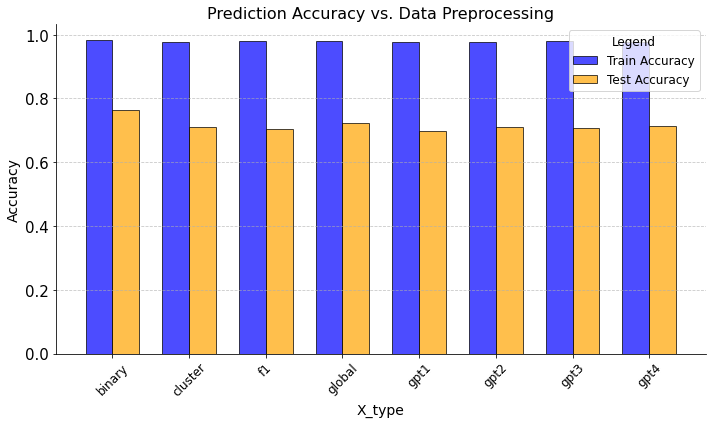

In [154]:
plot_grouped_accuracy_barchart(cluster_plotting, 'X_type', 'mean_distiller_true_accuracy_trainval', 'mean_distiller_true_accuracy_test', "Prediction Accuracy vs. Data Preprocessing")

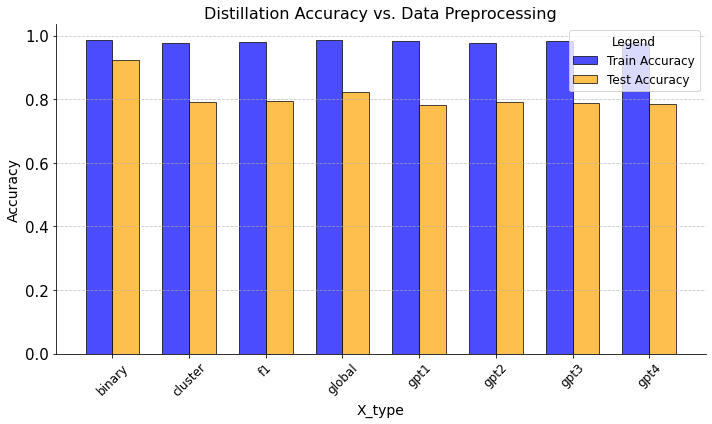

In [155]:
plot_grouped_accuracy_barchart(cluster_plotting, 'X_type', 'mean_distiller_cbm_accuracy_trainval', 'mean_distiller_cbm_accuracy_test', "Distillation Accuracy vs. Data Preprocessing")

In [159]:
def plot_model_editing_barchart(data, x_type_col, orig_col, group_col, indep_col, title):
    """
    Plots a grouped bar chart of train and test accuracy grouped by X_type.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        x_type_col (str): Name of the column representing X_type groups.
        train_col (str): Name of the column representing train accuracy.
        test_col (str): Name of the column representing test accuracy.
    """
    # Calculate mean accuracy for each X_type group
    grouped_cluster_data = data[data.concepts_to_edit=='random_clusters']#.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()
    grouped_indep_data = data[data.concepts_to_edit=='random_independent']#.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()
    # Extract values for plotting
    grouped_cluster_data = grouped_cluster_data[[x_type_col, orig_col, group_col]]
    grouped_cluster_data['group_' + group_col] = grouped_cluster_data[group_col]
    grouped_indep_data = grouped_indep_data[[x_type_col, orig_col, indep_col]]
    grouped_indep_data['indep_' + group_col] = grouped_indep_data[indep_col]
    
    grouped_data = pd.merge(grouped_cluster_data, grouped_indep_data, on=x_type_col)
    #return grouped_data
    grouped_data = grouped_data.sort_values('X_type', ascending=True)
    x_types = grouped_data[x_type_col]
    orig_acc = grouped_data[orig_col+'_x']
    group_acc = grouped_data['group_' + group_col]
    indep_acc = grouped_data['indep_' + indep_col]
    
    # Define bar positions
    bar_width = 0.2
    x = range(len(x_types))
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, orig_acc, width=bar_width, label='Original Accuracy', alpha=0.7, color='blue', edgecolor='black')
    plt.bar([p + bar_width for p in x], group_acc, width=bar_width, label='Group Edited Accuracy', alpha=0.7, color='orange', edgecolor='black')
    plt.bar([p + bar_width*2 for p in x], indep_acc, width=bar_width, label='Independent Edited Accuracy', alpha=0.7, color='red', edgecolor='black')
    
    # Add labels, title, and legend
    plt.xlabel("X_type", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks([p + bar_width / 2 for p in x], x_types, fontsize=12, rotation=45)
    plt.ylim(0, 1)
    plt.legend(fontsize=12, title="Legend", title_fontsize=12, loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'../figures/{title}.png')

# Example usage
# Assuming you have a DataFrame `df` with columns "X_type", "train_accuracy", "test_accuracy"
# plot_grouped_accuracy_barchart(df, "X_type", "train_accuracy", "test_accuracy")


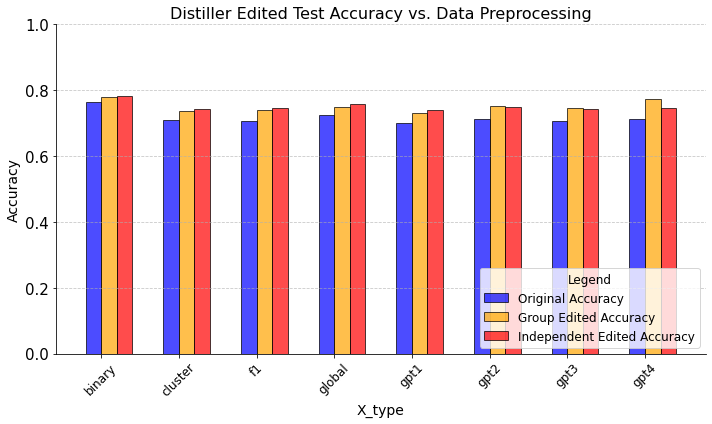

In [160]:
plot_model_editing_barchart(r, 'X_type', 'mean_distiller_true_accuracy_test', 'mean_edited_distiller_true_accuracy_test', 'mean_edited_distiller_true_accuracy_test', "Distiller Edited Test Accuracy vs. Data Preprocessing")

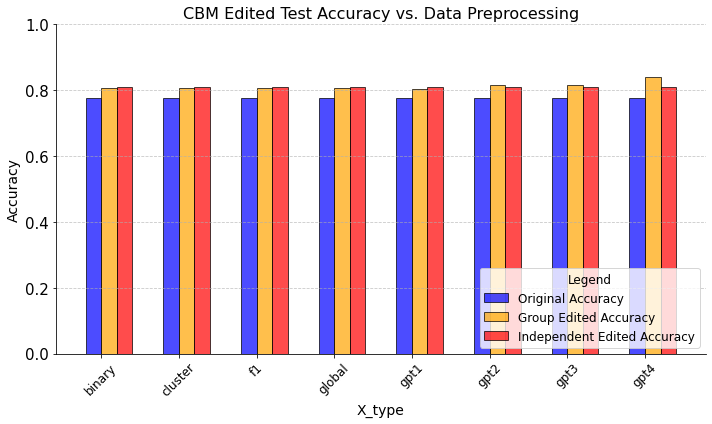

In [161]:
plot_model_editing_barchart(r, 'X_type', 'mean_cbm_true_accuracy_test', 'mean_edited_cbm_true_accuracy_test', 'mean_edited_cbm_true_accuracy_test', "CBM Edited Test Accuracy vs. Data Preprocessing")



In [166]:
r[['X_type', 'concepts_to_edit', 'mean_cbm_true_accuracy_test', 'mean_edited_cbm_true_accuracy_test']]

,X_type,concepts_to_edit,mean_cbm_true_accuracy_test,mean_edited_cbm_true_accuracy_test
0,gpt3,random_independent,0.777126,0.809516
1,gpt4,random_independent,0.777126,0.809516
2,gpt1,random_independent,0.777126,0.809516
3,gpt2,random_clusters,0.777126,0.814866
4,cluster,random_independent,0.777126,0.809516
5,cluster,random_clusters,0.777126,0.805834
6,global,random_clusters,0.777126,0.805834
7,f1,random_independent,0.777126,0.809516
8,f1,random_clusters,0.777126,0.805834
9,binary,random_clusters,0.777126,0.805834


In [ ]:
r[['model_name','mean_distiller_cbm_accuracy_trainval', 'mean_edited_distiller_cbm_accuracy_trainval', 'mean_distiller_cbm_accuracy_test', 'mean_edited_distiller_cbm_accuracy_test']]

In [ ]:
r[['model_name','mean_cbm_true_accuracy_trainval', 'mean_edited_cbm_true_accuracy_trainval', 'mean_distiller_true_accuracy_trainval', 'mean_edited_distiller_true_accuracy_trainval',]]

In [ ]:
r[['model_name', 'mean_%_correct_overlap_trainval', 'mean_%_correct_overlap_test', 'mean_edited_%_correct_overlap_trainval', 'mean_edited_%_correct_overlap_test']]